In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/moore.csv', header=None).values

In [3]:
X = data[:,0].reshape(-1,1)
y = data[:,1]

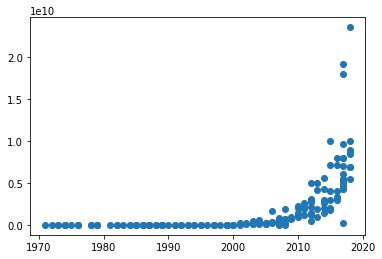

In [4]:
plt.scatter(X,y)

In [5]:
y = np.log(X)

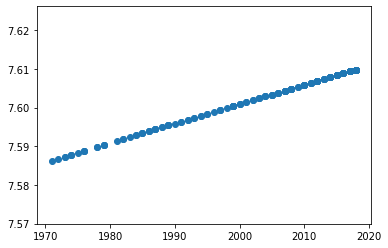

In [6]:
plt.scatter(X,y)

In [7]:
X = X - X.mean()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
N, D = X_train.shape

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1)
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')

In [11]:
#Learning rate scheduler
def schedule(epoch):
    if epoch >=50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [12]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[scheduler])

Epoch 1/200
4/4 [==============================] - 0s 79ms/step - loss: 279.7011 - val_loss: 456.4234 - lr: 0.0010
Epoch 2/200
4/4 [==============================] - 0s 26ms/step - loss: 285.3060 - val_loss: 99.3167 - lr: 0.0010
Epoch 3/200
4/4 [==============================] - 0s 20ms/step - loss: 164.5643 - val_loss: 49.0416 - lr: 0.0010
Epoch 4/200
4/4 [==============================] - 0s 23ms/step - loss: 75.7602 - val_loss: 61.2086 - lr: 0.0010
Epoch 5/200
4/4 [==============================] - 0s 19ms/step - loss: 58.0918 - val_loss: 40.4610 - lr: 0.0010
Epoch 6/200
4/4 [==============================] - 0s 16ms/step - loss: 47.8450 - val_loss: 53.2192 - lr: 0.0010
Epoch 7/200
4/4 [==============================] - 0s 18ms/step - loss: 30.4771 - val_loss: 27.2453 - lr: 0.0010
Epoch 8/200
4/4 [==============================] - 0s 16ms/step - loss: 36.2018 - val_loss: 31.0500 - lr: 0.0010
Epoch 9/200
4/4 [==============================] - 0s 14ms/step - loss: 35.0254 - val_loss: 

4/4 [==============================] - 0s 15ms/step - loss: 0.0011 - val_loss: 0.0011 - lr: 1.0000e-04
Epoch 74/200
4/4 [==============================] - 0s 17ms/step - loss: 0.0011 - val_loss: 0.0011 - lr: 1.0000e-04
Epoch 75/200
4/4 [==============================] - 0s 15ms/step - loss: 0.0010 - val_loss: 0.0011 - lr: 1.0000e-04
Epoch 76/200
4/4 [==============================] - 0s 15ms/step - loss: 0.0010 - val_loss: 0.0011 - lr: 1.0000e-04
Epoch 77/200
4/4 [==============================] - 0s 15ms/step - loss: 0.0010 - val_loss: 0.0011 - lr: 1.0000e-04
Epoch 78/200
4/4 [==============================] - 0s 16ms/step - loss: 9.9379e-04 - val_loss: 0.0010 - lr: 1.0000e-04
Epoch 79/200
4/4 [==============================] - 0s 18ms/step - loss: 9.7696e-04 - val_loss: 0.0010 - lr: 1.0000e-04
Epoch 80/200
4/4 [==============================] - 0s 19ms/step - loss: 9.6278e-04 - val_loss: 0.0010 - lr: 1.0000e-04
Epoch 81/200
4/4 [==============================] - 0s 19ms/step - loss: 

4/4 [==============================] - 0s 15ms/step - loss: 3.7085e-04 - val_loss: 3.7873e-04 - lr: 1.0000e-04
Epoch 140/200
4/4 [==============================] - 0s 15ms/step - loss: 3.6503e-04 - val_loss: 3.7920e-04 - lr: 1.0000e-04
Epoch 141/200
4/4 [==============================] - 0s 16ms/step - loss: 3.5863e-04 - val_loss: 3.7472e-04 - lr: 1.0000e-04
Epoch 142/200
4/4 [==============================] - 0s 15ms/step - loss: 3.5328e-04 - val_loss: 3.6980e-04 - lr: 1.0000e-04
Epoch 143/200
4/4 [==============================] - 0s 16ms/step - loss: 3.4728e-04 - val_loss: 3.6766e-04 - lr: 1.0000e-04
Epoch 144/200
4/4 [==============================] - 0s 15ms/step - loss: 3.4247e-04 - val_loss: 3.5973e-04 - lr: 1.0000e-04
Epoch 145/200
4/4 [==============================] - 0s 15ms/step - loss: 3.3592e-04 - val_loss: 3.4854e-04 - lr: 1.0000e-04
Epoch 146/200
4/4 [==============================] - 0s 17ms/step - loss: 3.3143e-04 - val_loss: 3.3479e-04 - lr: 1.0000e-04
Epoch 147/200


In [13]:
print("Train Score : ", model.evaluate(X_train, y_train))
print("Test Score : ", model.evaluate(X_test, y_test))

4/4 [==============================] - 0s 2ms/step - loss: 1.3652e-04
Train Score :  0.00013651773042511195
2/2 [==============================] - 0s 2ms/step - loss: 1.4523e-04
Test Score :  0.0001452346914447844


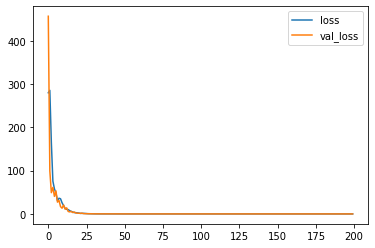

In [14]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

In [15]:
print(model.layers)

In [16]:
print(model.layers[0].get_weights())

[array([[0.0003983]], dtype=float32), array([7.5902524], dtype=float32)]


In [17]:
#Slope of the line
print(model.layers[0].get_weights()[0][0,0])

0.0003983031


In [18]:
print("Time to double:", np.log(2)/0.0004864621)

Time to double: 1424.8739635830732


In [19]:
X = np.array(X).flatten()
Y = np.array(y)
deno = X.dot(X) - X.mean() * X.sum()
a = (X.dot(y) - y.mean() * X.sum()) / deno
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y))/deno
print(a,b)
print("Time to double :", np.log(2) / a)

[0.00050062] [7.60197732]
Time to double : [1384.57144359]


### Predict

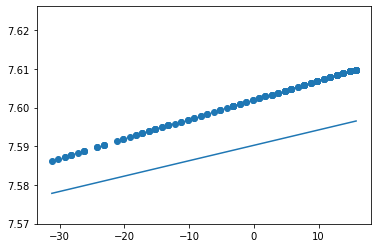

In [20]:
Yhat = model.predict(X).flatten()
plt.scatter(X,y)
plt.plot(X,Yhat)
plt.show()

In [21]:
#Manual Calculations
w, b = model.layers[0].get_weights()
# Reshape X because we flattened it earlier
X = X.reshape(-1,1)
Yhat2 = (X.dot(w) + b).flatten()
np.allclose(Yhat, Yhat2)

True

In [ ]:
model.save